In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data

df = pd.read_excel('data_final.xlsx')
df

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


#### EDA

In [3]:
df.shape

# there are 100 rows and 3 columns

(100, 3)

In [4]:
df.info(all)

# All the columns are of numeric float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
# Checking for null values

df.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

There are no null values present in the dataset

In [6]:
# Describing the dataset

df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


- Maximum price per square foot is 1563
- Minimum price 42

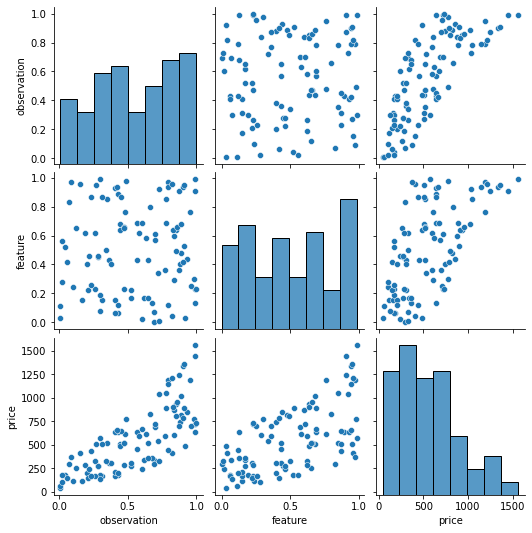

In [7]:
sns.pairplot(df)

### Separating independent and dependent variables

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
X

array([[0.44, 0.68],
       [0.99, 0.23],
       [0.84, 0.29],
       [0.28, 0.45],
       [0.07, 0.83],
       [0.66, 0.8 ],
       [0.73, 0.92],
       [0.57, 0.43],
       [0.43, 0.89],
       [0.27, 0.95],
       [0.43, 0.06],
       [0.87, 0.91],
       [0.78, 0.69],
       [0.9 , 0.94],
       [0.41, 0.06],
       [0.52, 0.17],
       [0.47, 0.66],
       [0.65, 0.43],
       [0.85, 0.64],
       [0.93, 0.44],
       [0.41, 0.93],
       [0.36, 0.43],
       [0.78, 0.85],
       [0.69, 0.07],
       [0.04, 0.52],
       [0.17, 0.15],
       [0.68, 0.13],
       [0.84, 0.6 ],
       [0.38, 0.4 ],
       [0.12, 0.65],
       [0.62, 0.17],
       [0.79, 0.97],
       [0.82, 0.04],
       [0.91, 0.53],
       [0.35, 0.85],
       [0.57, 0.69],
       [0.52, 0.22],
       [0.31, 0.15],
       [0.6 , 0.02],
       [0.99, 0.91],
       [0.48, 0.76],
       [0.3 , 0.19],
       [0.58, 0.62],
       [0.65, 0.17],
       [0.6 , 0.69],
       [0.95, 0.76],
       [0.47, 0.23],
       [0.15,

In [10]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

### Splitting into train and test data

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [12]:
X_train.shape, X_test.shape

((80, 2), (20, 2))

In [13]:
y_train.shape, y_test.shape

((80,), (20,))

In [14]:
# Importing metrics and model api

from sklearn import metrics
import statsmodels.api as sm

Implementing Linear regression

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Polynomial Regression with degree 2

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y_train)

LinearRegression()

In [17]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
y_pred

array([ 356.97041624,  131.48679167,  612.24585213,  141.46564912,
        574.45079704,  227.7049998 ,  522.44355571,  482.69995215,
        624.72075471,  632.03897372,  705.47890319, 1028.58725282,
       1152.75931229, 1322.04882209,  460.49939796,  337.77307228,
       1046.55961454,  159.74693596,  906.45307885,  643.47703027])

##### Performance metrics for degree 2 model

In [18]:
metrics.mean_squared_error(y_test,y_pred)

57.72843565622088

In [19]:
metrics.r2_score(y_test, y_pred)

0.9994809534787271

- Error: 57.72
- Accuracy: 99.94%

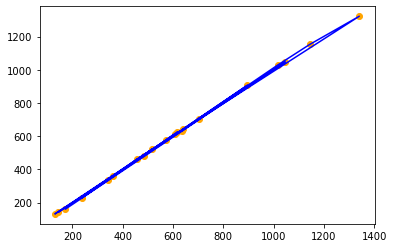

In [20]:
plt.scatter(y_test,y_pred,color='orange')
plt.plot(y_test,y_pred,color='blue')

### Plynomial Regression with degree 3

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(X_train)
lin_reg3 = LinearRegression()
lin_reg3.fit(x_poly,y_train)

LinearRegression()

In [22]:
y_pred3 = lin_reg3.predict(poly_reg.fit_transform(X_test))
y_pred3

array([ 359.50360287,  131.23834372,  609.16930978,  149.98412841,
        566.72101623,  237.76303341,  520.60934004,  485.30770519,
        619.83089854,  632.50577664,  703.21376307, 1024.98728581,
       1151.24558258, 1330.85054638,  460.70580041,  340.84136488,
       1041.64246977,  170.75998438,  901.57838952,  636.04094675])

##### Performance metrics for degree 2 model

In [23]:
metrics.mean_squared_error(y_test,y_pred3)

22.241818750637222

In [24]:
metrics.r2_score(y_test, y_pred3)

0.999800019894562

- Error: 22.24
- Accuracy: 99.99%

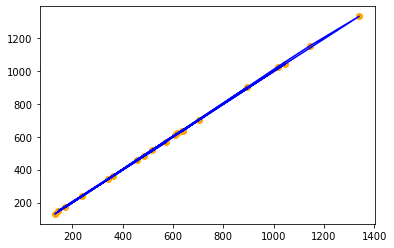

In [25]:
#Scatter plot for polynomial regression model with degree 3

plt.scatter(y_test,y_pred3,color='orange')
plt.plot(y_test,y_pred3,color='blue')

#### Comparing predicted and actual results

In [27]:
df_test = pd.DataFrame(y_test.copy(), columns=['Actual'])

In [28]:
df_test['Predicted'] = y_pred3

In [29]:
df_test

,Actual,Predicted
0,361.97,359.503603
1,130.77,131.238344
2,607.91,609.169310
3,143.79,149.984128
4,572.31,566.721016
5,237.69,237.763033
6,517.43,520.609340
7,483.13,485.307705
8,615.74,619.830899
9,636.22,632.505777


It is seen that the predicted results nearly accurate

In [26]:
# Summary of model

x_stats = sm.add_constant(X_train)
summ = sm.OLS(y_train,x_stats).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     567.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           8.03e-47
Time:                        17:28:38   Log-Likelihood:                -471.29
No. Observations:                  80   AIC:                             948.6
Df Residuals:                      77   BIC:                             955.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -257.7030     25.766    -10.002      0.000    -309.009    -206.397
x1           880.1814     34.631     25.416      0.000     811.223     949.140
x2           655.9319     32.754     20.026      0.000     590.709     721.154
==============================================================================
Omnibus:                       30.682   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.370
Skew:                           1.601   Prob(JB):                     1.90e-11
Kurtosis:                       5.136   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion

1. Almost all the points are on the the line of regression, hence, it is safe to day that polunomial regression would be the best model to predict price per square foot.
2. According to the performance metrics of both the polynomial regression model with degree 2 and 3, it is seen that the model with degree 3 has more accuracy than the model with degree 2 and much less mean squared error than model with degree2.
3. Therefore, we can choose a model with degree 3 that would guve the best result with high accuracy.